In [46]:
# Import required models 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sbn
import pickle

In [20]:
# Import heart disease dataset
dataset = pd.read_csv('Heart_Disease_Prediction.csv')
dataset.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [21]:
!cp ./requirements.txt ../


cp: cannot stat './requirements.txt': No such file or directory


In [22]:
# Look up for missing values in the dataset
dataset.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [23]:
dataset.shape

(270, 14)

<Axes: >

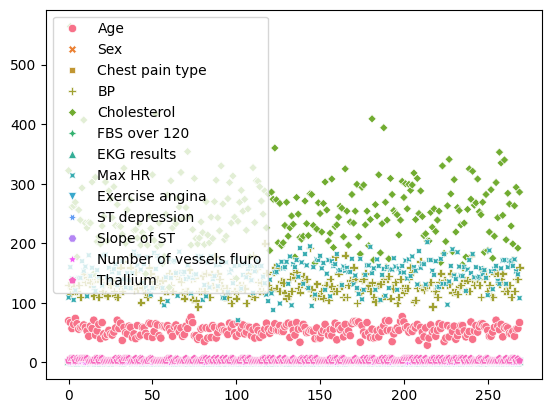

In [27]:
# Visualize data to search for the presence of outliers
sbn.scatterplot(data=dataset)

In [31]:
# seperate the dataset into target and features 
X = dataset.drop(columns="Heart Disease", axis=1)
y = dataset['Heart Disease']


In [33]:
# Initialize the scaler function
scaler = StandardScaler()

# Standardize the features 
X = scaler.fit_transform(X)


1.0


In [34]:
# Split the dataset into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, stratify=y, random_state=34)
print(X.shape, X_train.shape, X_test.shape)

(270, 13) (243, 13) (27, 13)


In [37]:
# Prepare the model for training 
model = svm.SVC(kernel="linear", C=1, random_state=34)
model.fit(X_train, y_train)


SVC(C=1, kernel='linear', random_state=34)

In [41]:
"""Determine the models performance"""
# getting the predictions of both trained and test data
y_train_pred = model.predict(X_train)
y_test_pred =  model.predict(X_test)

# Getting the accuracy scores for model predictions in both cases 
y_train_accur = accuracy_score(y_true=y_train, y_pred=y_train_pred)
print(y_train_accur)
y_test_accur = accuracy_score(y_test, y_test_pred)
print(y_test_accur)

0.8436213991769548
0.9259259259259259


In [47]:
# Download the trained as a pickle file for api
with open("diabetes_pred_model-0.1.0.sav", 'wb') as f:
    pickle.dump(model, f)

In [51]:
dataset.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')